<a href="https://colab.research.google.com/github/Guna940/Ex06-Name-Entity-Recognition/blob/main/Ex06-Name-Entity-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [4]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [5]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [6]:
words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())
print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [7]:
num_words = len(words)
num_tags = len(tags)
num_words

35179

In [8]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [9]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [10]:
len(sentences)

47959

In [11]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [12]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

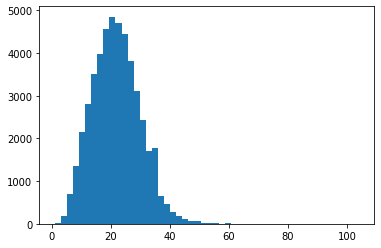

In [13]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [14]:
X1 = [[word2idx[w[0]] for w in s] for s in sentences]
type(X1[0])

list

In [15]:
max_len = 50
X1[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [16]:
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [17]:
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums,maxlen=2)

array([[0, 1],
       [2, 3],
       [5, 6]], dtype=int32)

In [18]:
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [19]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)
X_train[0]

array([  596,  3837,  4197,    10,  7870,   251,  1071,     8,  2233,
           2,   667,    69,  5117,    14,    10,   450, 11085,   880,
         881,   183,    12,   667,    22, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [21]:
y_train[0]

array([0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
from keras.layers.rnn import bidirectional
input_word=layers.Input(shape=(max_len,))
embedding_layer=layers.Embedding(input_dim= num_words,
                                 output_dim=50,
                                 input_length=num_words)(input_word)
dropout_layer = layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm = layers.Bidirectional(
    layers.LSTM(units=100, return_sequences = True, 
                recurrent_dropout=0.1)) (dropout_layer)   
output=layers.TimeDistributed(layers.Dense(num_tags,activation='softmax'))(bidirectional_lstm) 
model = Model(input_word, output)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=
['accuracy'])        

In [31]:
history = model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1199/1199 [==============================] - 285s 233ms/step - loss: 0.1764 - accuracy: 0.9594 - val_loss: 0.0670 - val_accuracy: 0.9810
Epoch 2/3
1199/1199 [==============================] - 272s 227ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.0505 - val_accuracy: 0.9849
Epoch 3/3
1199/1199 [==============================] - 269s 224ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0479 - val_accuracy: 0.9858


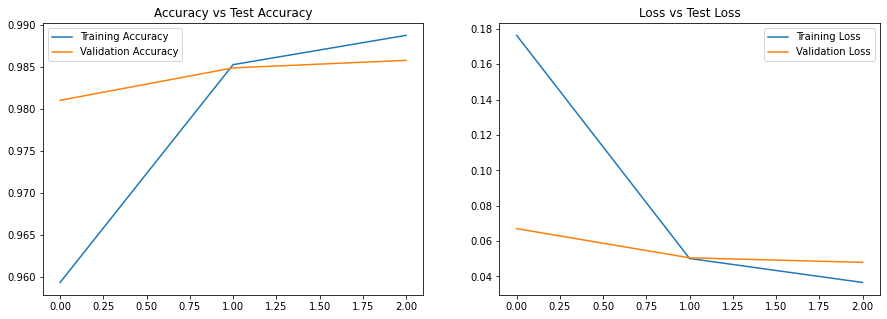

In [32]:
metrics = pd.DataFrame(model.history.history)
metrics.iloc[metrics.shape[0]-1,:]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(metrics[['accuracy','val_accuracy']])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.title("Accuracy vs Test Accuracy")
plt.subplot(1,2,2)
plt.plot(metrics[['loss','val_loss']])
plt.legend(["Training Loss","Validation Loss"])
plt.title("Loss vs Test Loss")
plt.show()

In [35]:
i = 30
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 65ms/step
Word           True 	 Pred

------------------------------
The            B-org	O
African        I-org	B-gpe
Union          I-org	I-org
's             O	O
peace          O	O
and            O	O
security       O	O
council        O	O
has            O	O
called         O	O
on             O	O
all            O	O
African        B-gpe	B-gpe
countries      O	O
to             O	O
impose         O	O
sanctions      O	O
against        O	O
Togo           B-geo	B-geo
over           O	O
the            O	O
military       O	O
's             O	O
installation   O	O
of             O	O
President      B-per	B-per
Faure          I-per	I-per
Gnassingbe     I-per	I-per
.              O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel      